In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/ford.csv")
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
dataset.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [ ]:
dataset.shape

(17966, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
dataset.isnull().sum()

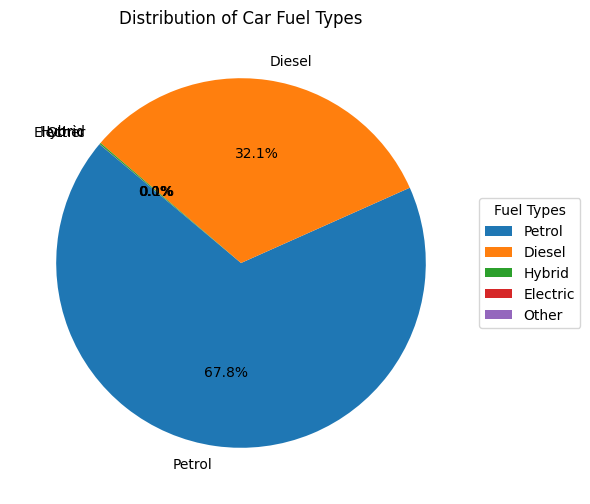

In [ ]:
# Count the occurrences of each fuel type
import matplotlib.pyplot as plt
fuel_counts = dataset['fuelType'].value_counts()
# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Fuel Types')
plt.legend(fuel_counts.index, title="Fuel Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#printing the unique value
print(dataset['transmission'].unique())
print(dataset['fuelType'].unique())

In [ ]:
#Encoding the categorical transmission and fuelType column
dataset.replace({'transmission':{'Automatic':0,'Manual':1,'Semi-Auto':2}},inplace=True)
dataset.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':4}},inplace=True)

In [ ]:
dataset.head(5)

In [ ]:
# Create a distribution plot for the 'price' column in the 'dataset'
# The 'kde=True' parameter adds a Kernel Density Estimate plot
import seaborn as sns
sns.displot(dataset['price'],kde=True)

In [ ]:
x = dataset.drop(['model','price'],axis=1).values
y = dataset['price']

<ipython-input-57-f3eb1500de17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


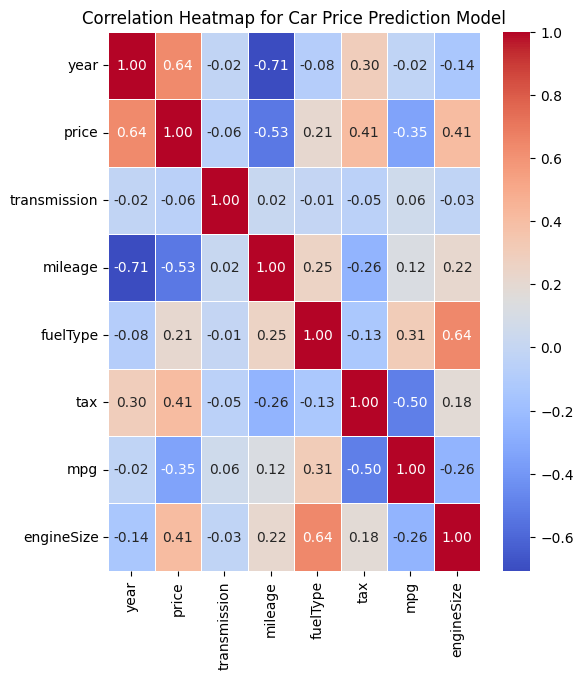

In [ ]:
correlation_matrix = dataset.corr()
# Create a heatmap
plt.figure(figsize=(6, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Car Price Prediction Model")
plt.show()

In [ ]:
# Create a StandardScaler instance
ss = StandardScaler()
ss.fit(x)
standarized_x = ss.transform(x)
print(standarized_x)
x = standarized_x

[[ 0.06512772 -2.67003231 -0.38099808 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 0.55286624  0.04135139 -0.73335899 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 0.06512772  0.04135139 -0.56013157 ...  0.59135805 -0.02044162
  -0.81138621]
 ...
 [-0.91034931  0.04135139 -0.83982222 ... -1.50505332  0.92766777
   0.57636151]
 [ 0.55286624  0.04135139 -0.94269045 ...  0.51072684 -0.02044162
  -0.34880364]
 [-0.91034931  0.04135139 -0.94269045 ... -1.47280084 -0.02044162
  -0.81138621]]


In [ ]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(17966, 7) (14372, 7) (3594, 7)
(17966,) (14372,) (3594,)


In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)
y_pred = linearRegression.predict(x_test)
lr=r2_score(y_test, y_pred)
print("R2 score on training data:",lr)

R2 score on training data: 0.7371634634107636


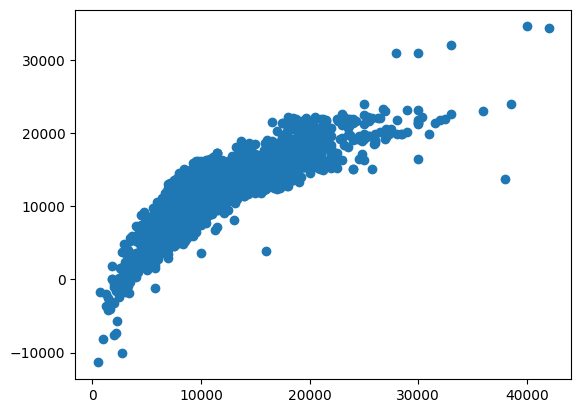

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
#model building
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)

    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [ ]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 73.56949202165862
r2_Score of LinearRegression() model on Testing Data is: 73.71634634107636


In [ ]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.9600561008004
r2_Score of DecisionTreeRegressor() model on Testing Data is: 86.26863969793456


In [ ]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.70644155591557
r2_Score of RandomForestRegressor() model on Testing Data is: 90.84750450162964


In [ ]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 89.90114252003612
r2_Score of GradientBoostingRegressor() model on Testing Data is: 88.62924598722206


In [ ]:
models = ["Linear Regression","Decision Tree","Random Forest","Gradient Boost"]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,73.569492,73.716346
1,Decision Tree,99.960056,86.268640
2,Random Forest,98.706442,90.847505
3,Gradient Boost,89.901143,88.629246


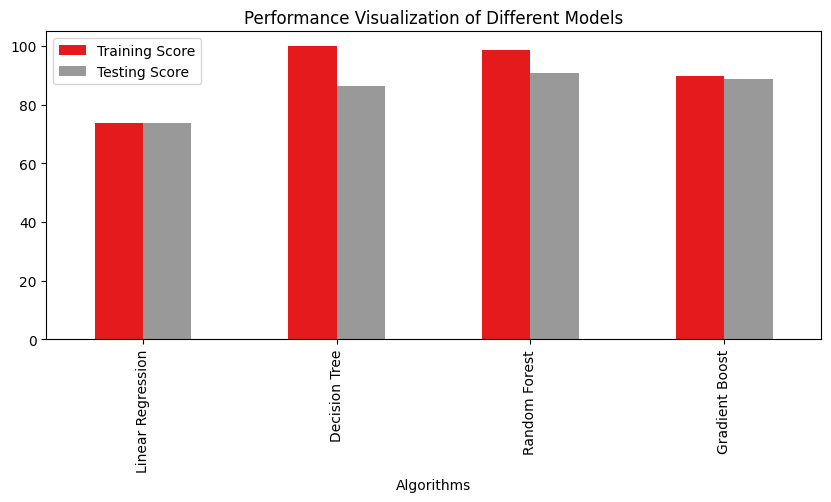

In [ ]:
s# Use the plot method of DataFrame to create a bar plot
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(10,4),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()